In [ ]:
import numpy as np
import pandas as pd

import plotly.express as px
import matplotlib.pyplot as plt

import matplotlib.colors as mcolors



In [34]:
date = 2025
experiment = 13
initial_date = 2010
final_date = 2025
# overwrite date if needed
date = final_date

results = pd.read_csv(f'experiments_results/experiment {experiment}/status_{date}.csv')
memberships_df = pd.read_csv(f'experiments_results/experiment {experiment}/memberships_df_final_{final_date}.csv')
persons_df = pd.read_csv(f'experiments_results/experiment {experiment}/persons_df_final_{final_date}.csv')

memberships_df = memberships_df.merge(persons_df[['person_id', 'primary_hh']], on='person_id', how='left')


#### GROUPED STATS #### 

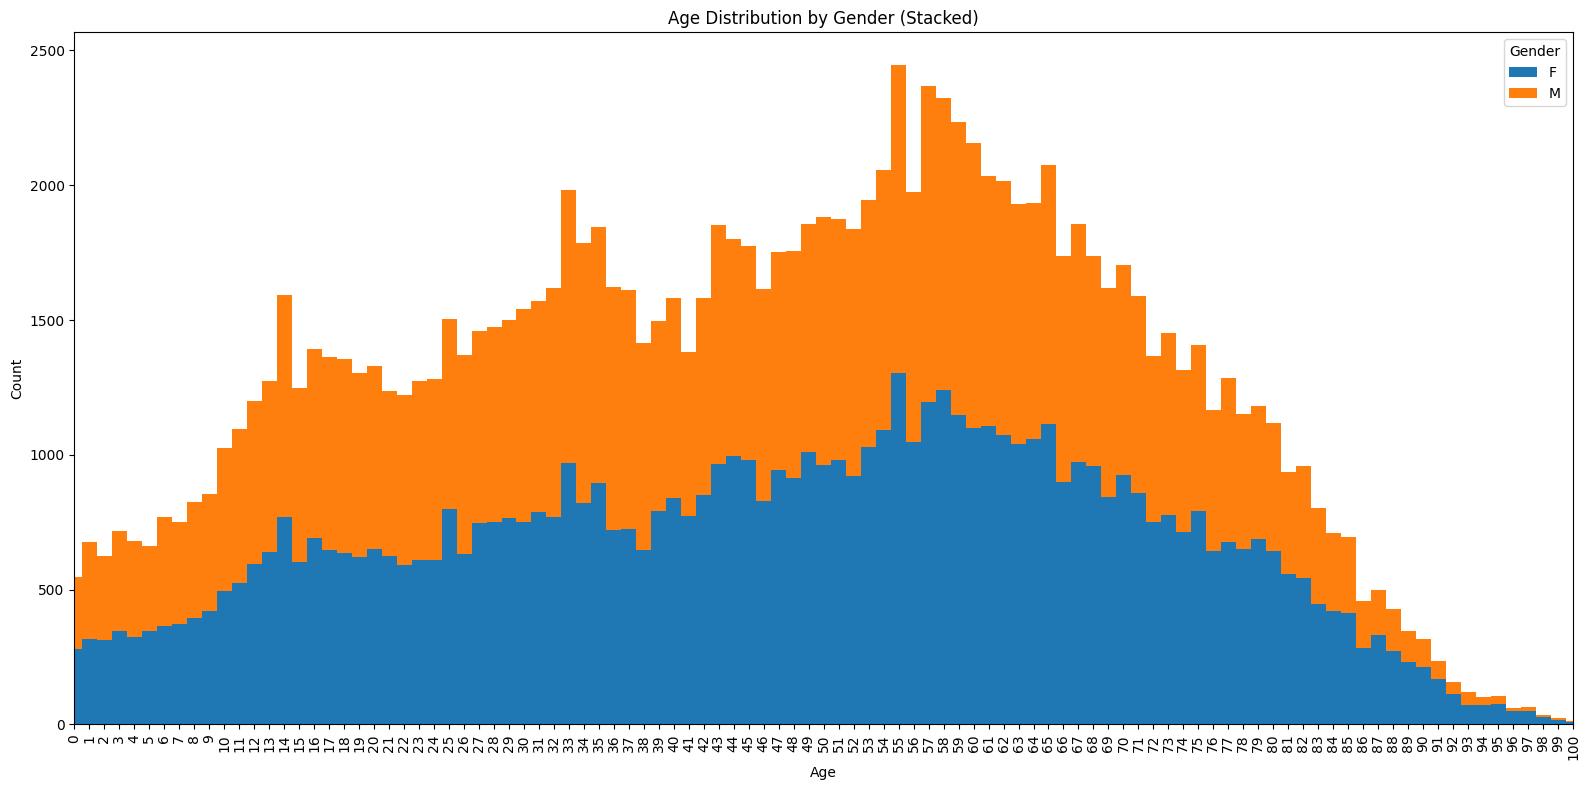

In [35]:
# Plot age distribution split by gender
ax = results.groupby('gender')['age'].value_counts().unstack(0).plot(
	kind='bar', stacked=True, width=1, figsize=(16, 8))
ax.set_xlabel('Age')
ax.set_ylabel('Count')
ax.set_title('Age Distribution by Gender (Stacked)')
ax.set_xlim(0, 100)

plt.legend(title='Gender')
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

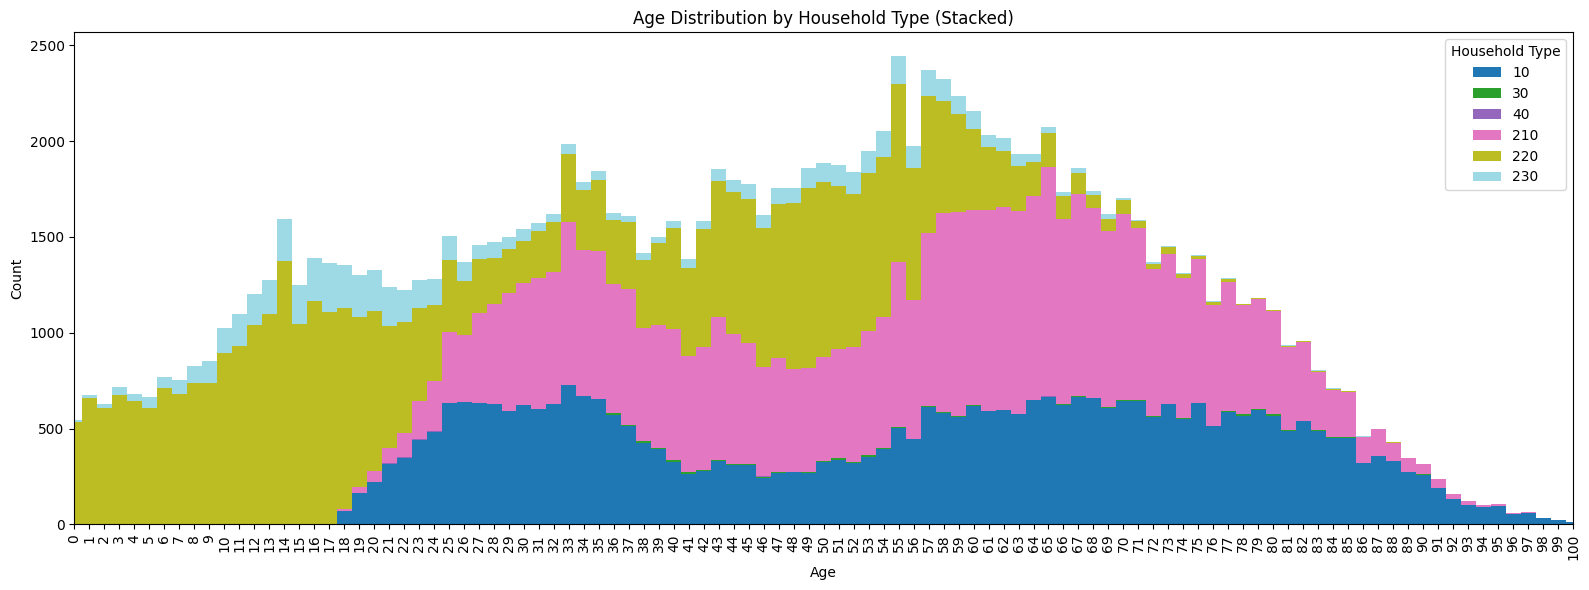

In [36]:
# Plot age distribution split by htype
plt.figure(figsize=(12, 6))
ax_htype = results.groupby('htype')['age'].value_counts().unstack(0).plot(
    kind='bar', stacked=True, width=1, colormap='tab20', figsize=(16, 6))
ax_htype.set_xlabel('Age')
ax_htype.set_ylabel('Count')
ax_htype.set_title('Age Distribution by Household Type (Stacked)')
ax_htype.set_xlim(0, 100)
plt.legend(title='Household Type')
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

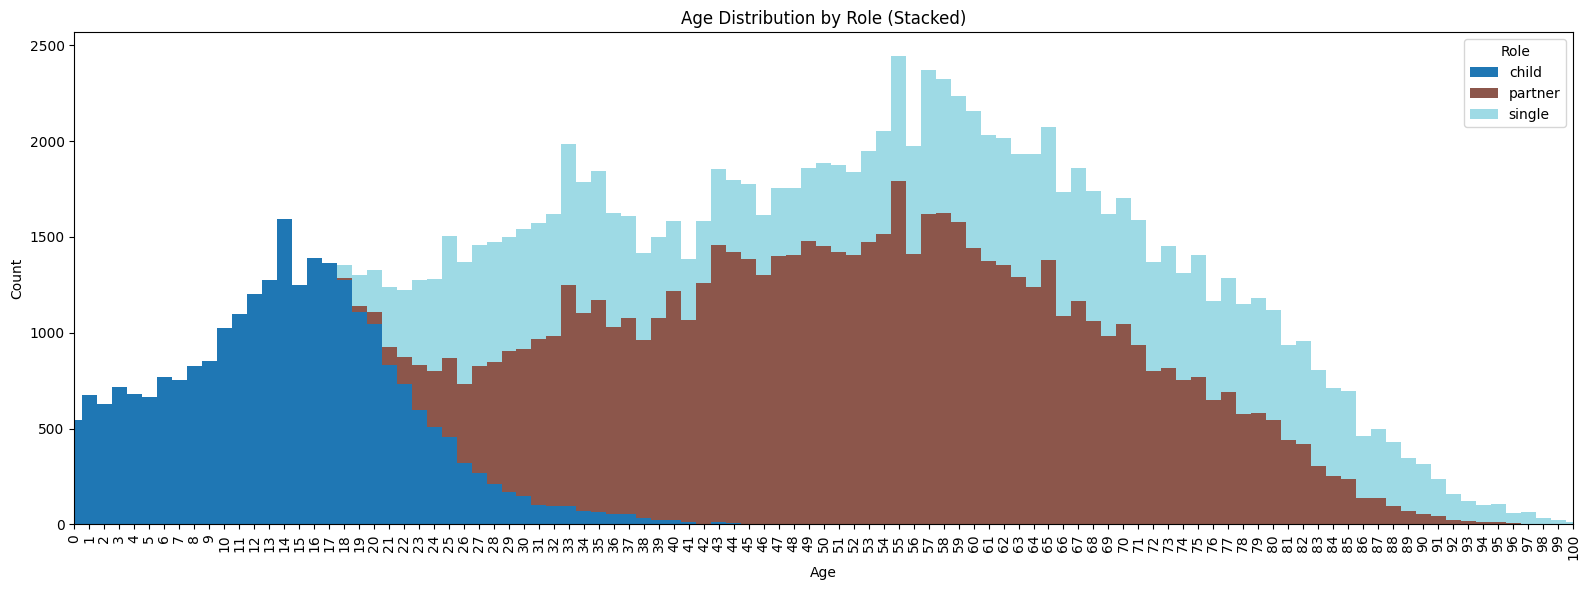

In [37]:
# Plot age distribution split by htype
plt.figure(figsize=(12, 6))
ax_htype = results.groupby('role')['age'].value_counts().unstack(0).plot(
    kind='bar', stacked=True, width=1, colormap='tab20', figsize=(16, 6))
ax_htype.set_xlabel('Age')
ax_htype.set_ylabel('Count')
ax_htype.set_title('Age Distribution by Role (Stacked)')
ax_htype.set_xlim(0, 100)
plt.legend(title='Role')
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

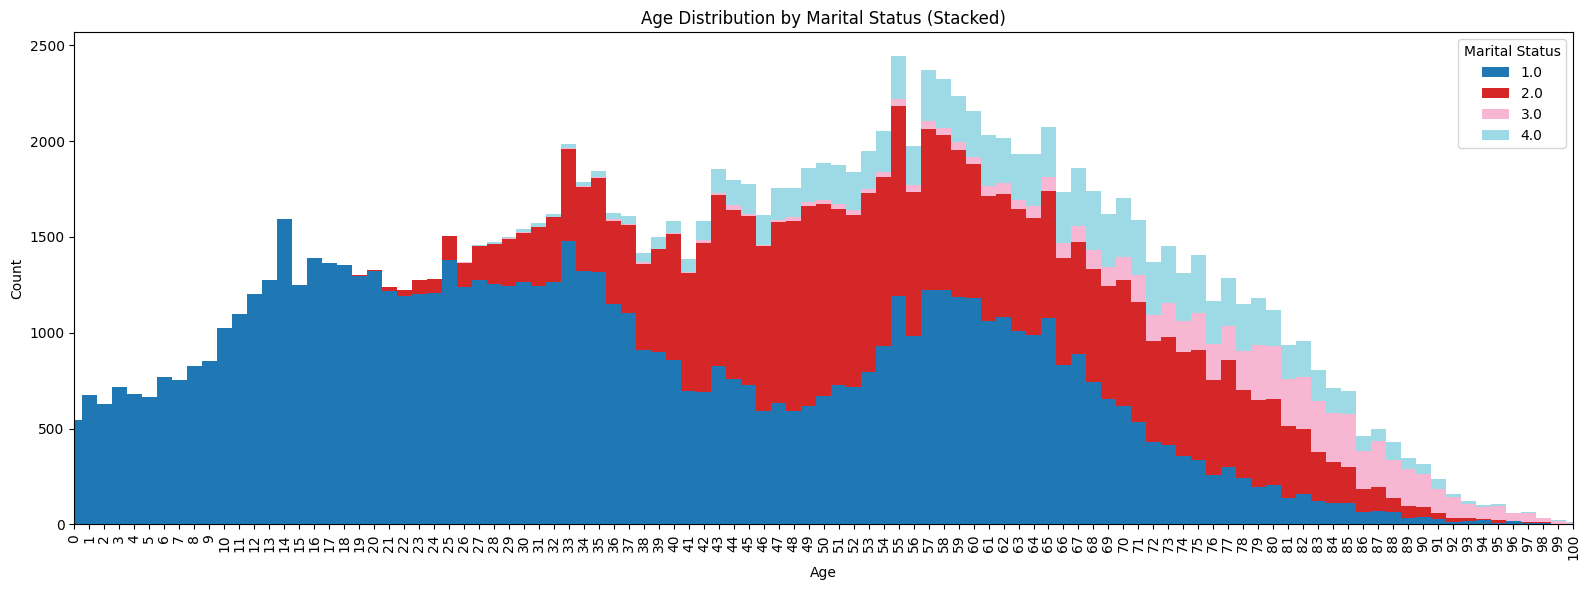

In [38]:
# Plot age distribution split by htype
plt.figure(figsize=(12, 6))
ax_htype = results.groupby('marital_status')['age'].value_counts().unstack(0).plot(
    kind='bar', stacked=True, width=1, colormap='tab20', figsize=(16, 6))
ax_htype.set_xlabel('Age')
ax_htype.set_ylabel('Count')
ax_htype.set_title('Age Distribution by Marital Status (Stacked)')
ax_htype.set_xlim(0, 100)
plt.legend(title='Marital Status')
plt.tight_layout()
plt.show()

#### AGE PYRAMID (Age, Sex, Marital Status) ####

In [39]:
# Prepare data for population pyramid
pyramid_data = results.copy()
pyramid_data['count'] = 1

# Group by age, gender, and role
grouped = pyramid_data.groupby(['age', 'gender', 'role']).size().reset_index(name='count')

# For population pyramid, males are negative
grouped['count'] = grouped.apply(lambda row: -row['count'] if row['gender'] == 'F' else row['count'], axis=1)

# Convert role to string for better legend
grouped['role'] = grouped['role'].astype(str)


fig = px.bar(
    grouped,
    x='count',
    y='age',
    color='role',
    orientation='h',
    facet_col='gender',
    labels={'count': 'Population', 'age': 'Age', 'role': 'Role'},
    title='Population Pyramid by Gender, Age, and Role',
    hover_data=['age', 'gender', 'role','count'],
    height=1000,
    width=1300,
)

fig.update_xaxes(
    range=[-1500, 0],
    tickvals=[-1500, -1000, -500, 0],
    ticktext=[1500, 1000, 500, 0],
    matches=None,
    row=None, col=None,
    selector=dict(anchor='y')
)
fig.update_xaxes(
    range=[0, 1500],
    tickvals=[0, 500, 1000, 1500],
    ticktext=[0, 500, 1000, 1500],
    matches=None,
    row=None, col=None,
    selector=dict(anchor='y2')
)

fig.update_yaxes(range=[0, 100], matches='y')



fig.update_layout(bargap=0.05)
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
fig.show()

In [40]:
# Prepare data for population pyramid
pyramid_data = results.copy()
pyramid_data['count'] = 1

# Group by age, gender, and marital_status
grouped = pyramid_data.groupby(['age', 'gender', 'marital_status']).size().reset_index(name='count')

# For population pyramid, males are negative
grouped['count'] = grouped.apply(lambda row: -row['count'] if row['gender'] == 'F' else row['count'], axis=1)

# Convert marital_status to string for better legend
grouped['marital_status'] = grouped['marital_status'].astype(str)

marital_status_map = {
    "1.0": "single",
    "2.0": "married",
    "3.0": "divorced",
    "4.0": "widowed"
}
grouped['marital_status'] = grouped['marital_status'].map(marital_status_map)

fig = px.bar(
    grouped,
    x='count',
    y='age',
    color='marital_status',
    orientation='h',
    facet_col='gender',
    labels={'count': 'Population', 'age': 'Age', 'marital_status': 'Marital Status'},
    title='Population Pyramid by Gender, Age, and Marital Status',
    hover_data=['age', 'gender', 'marital_status','count'],
    height=1000,
    width=1300,
)

fig.update_xaxes(
    range=[-1500, 0],
    tickvals=[-1500, -1000, -500, 0],
    ticktext=[1500, 1000, 500, 0],
    matches=None,
    row=None, col=None,
    selector=dict(anchor='y')
)
fig.update_xaxes(
    range=[0, 1500],
    tickvals=[0, 500, 1000, 1500],
    ticktext=[0, 500, 1000, 1500],
    matches=None,
    row=None, col=None,
    selector=dict(anchor='y2')
)

fig.update_yaxes(range=[0, 100], matches='y')



fig.update_layout(bargap=0.05)
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
fig.show()

#### INDIVIDUAL EXAMPLE VISUALIZATION #### 

In [ ]:
# COLORS SELECTION

sel_colors = list(mcolors.TABLEAU_COLORS.values()) + [v for k, v in mcolors.XKCD_COLORS.items() if not any(
    x in k for x in ['grey', 'gray', 'beige', 'white', 'cream', 'yellow', 'tan', 'peach', 'apricot',
                      'gold', 'silver', 'ivory', 'khaki', 'sand', 'lemon', 'mustard', 'pale', 'light'])]

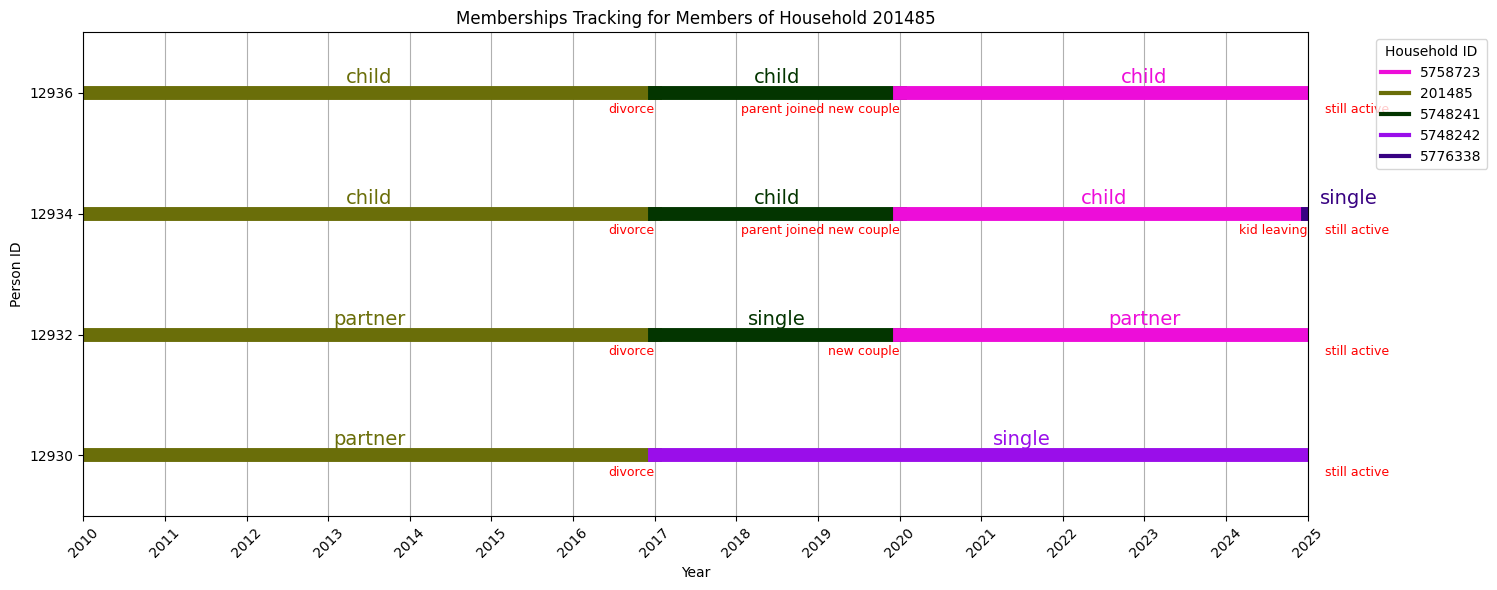

In [ ]:
# MEMBERSHIPS TRACKING FOR A HOUSEHOLD

household_id_to_track = None

from IPython.display import display

memberships_display = memberships_df.copy()

# Select a specific household_id to visualize
memberships_display.loc[memberships_display['end_date']==9999, 'end_date'] = final_date+1
memberships_display.loc[memberships_display['end_date'].isna(), 'end_date'] = final_date+1
memberships_display.loc[memberships_display['start_date']==initial_date-1, 'start_date'] = initial_date
memberships_display.loc[memberships_display['leave_cause'].isna(), 'leave_cause'] = 'still active'

# Assign a color to each role
role_colors = {
    'partner': 'tab:blue',
    'child': 'tab:orange',
    'single': 'tab:green',
    # add more roles if needed
}

if household_id_to_track is None:
    household_id = memberships_display.loc[memberships_display['start_date']==initial_date, 'household_id'].sample(1).iloc[0]
else:
    household_id = household_id_to_track

# Filter data for the selected household
household_members = memberships_display[memberships_display['household_id'] == household_id].copy()

# Add a color column to household_members based on role
household_members['color'] = household_members['role'].map(role_colors).fillna('gray')
# Use start_date and end_date as years (integers)
# household_members['start_date'] and ['end_date'] are already years

# Track and display next memberships for all members who ever belonged to the selected household

# Assign a unique color to each household_id for visualization
import matplotlib.colors as mcolors
# Use a larger palette and cycle through if needed
# Use only well visible Tableau and XKCD colors for the palette
well_visible_colors = list(mcolors.TABLEAU_COLORS.values()) + [v for k, v in mcolors.XKCD_COLORS.items() if not any(
    x in k for x in ['grey', 'gray', 'beige', 'white', 'cream', 'yellow', 'tan', 'peach', 'apricot',
                      'gold', 'silver', 'ivory', 'khaki', 'sand', 'lemon', 'mustard', 'pale', 'light'])]

all_colors = well_visible_colors
household_ids = memberships_display['household_id'].unique()
color_map = {hhid: all_colors[i % len(all_colors)] for i, hhid in enumerate(household_ids)}

person_ids = household_members['person_id'].unique()
person_id_to_y = {pid: i for i, pid in enumerate(person_ids)}

offset = 0.05  # Offset for text labels to avoid overlap

# For each member, plot all their memberships as lines, colored by household_id
plt.figure(figsize=(14, max(4,len(person_ids) * 1.5)))
for pid in person_ids:
    person_memberships = memberships_display[memberships_display['person_id'] == pid].sort_values('start_date')
    y = person_id_to_y[pid]
    for _, memb in person_memberships.iterrows():
        color = color_map.get(memb['household_id'], 'gray')
        plt.plot([memb['start_date'], memb['end_date']], [y, y], marker='X', color=color, linewidth=10)
        plt.text((memb['start_date']+(memb['end_date']-memb['start_date'])/2), y + offset,str(memb['role']),
                  va='bottom', ha='center', fontsize=14, color=color, )
        plt.text(memb['end_date'], y - 1.75*offset,str(memb['leave_cause']),
                  va='top', ha='right', fontsize=9, color='red')

        
plt.xlabel('Year')
plt.ylabel('Person ID')
plt.xlim(initial_date, final_date)
plt.ylim(-0.5, len(person_ids) - 0.5)
plt.xticks(range(initial_date, final_date + 1, 1), rotation=45)
plt.title(f'Memberships Tracking for Members of Household {household_id}')
plt.yticks(range(len(person_ids)), person_ids)
plt.grid(axis='x')
plt.tight_layout()

# Create legend for household_id colors (show only for those present in this plot)
used_hhids = set(memberships_display[memberships_display['person_id'].isin(person_ids)]['household_id'])
legend_handles = [plt.Line2D([0], [0], color=color_map[hhid], lw=3, label=str(hhid)) for hhid in used_hhids]
plt.legend(handles=legend_handles, title='Household ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


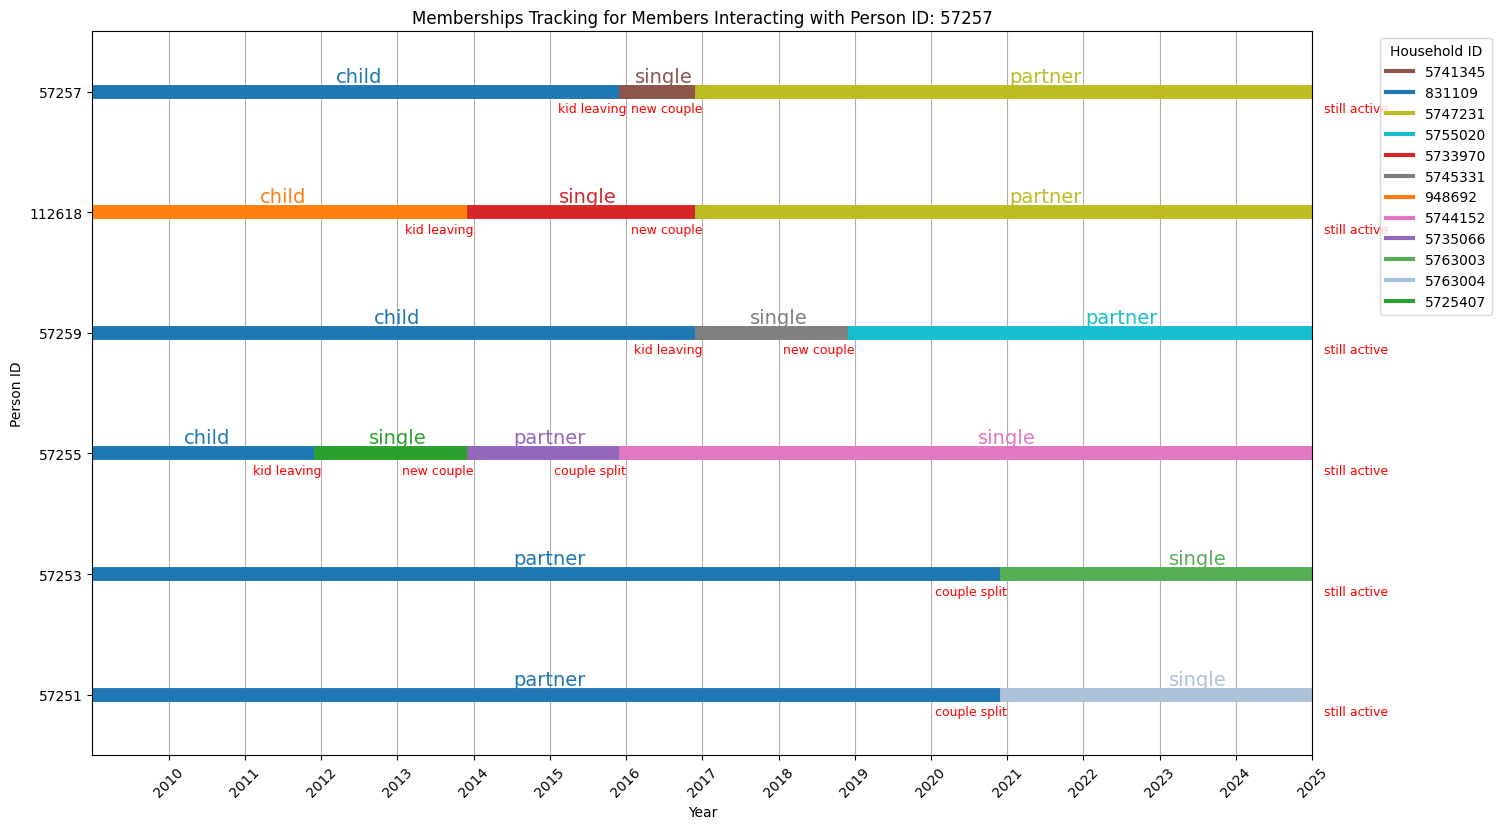

In [48]:
# MEMBERSHIPS TRACKING FOR A PERSON

person_id_to_track = None

from IPython.display import display

ms_display = memberships_df.copy()

# Select a specific household_id to visualize
ms_display.loc[ms_display['end_date']==9999, 'end_date'] = final_date+1
ms_display.loc[ms_display['end_date'].isna(), 'end_date'] = final_date+1
ms_display.loc[ms_display['start_date']==initial_date, 'start_date'] = initial_date-1
ms_display.loc[ms_display['leave_cause'].isna(), 'leave_cause'] = 'still active'

# Assign a color to each role
role_colors = {
    'partner': 'tab:blue',
    'child': 'tab:orange',
    'single': 'tab:green',
    # add more roles if needed
}

if person_id_to_track is None:
    prot_pid = ms_display.loc[(ms_display['start_date']==initial_date-1) &
                            (ms_display['role'] == 'child'), 'person_id'].sample(1).iloc[0]
else:
    prot_pid = person_id_to_track
    
# Filter data for the selected household
prot_all_hh_ids = ms_display.loc[ms_display['person_id'] == prot_pid,'household_id'].values.tolist()
interacting_pid = ms_display.loc[ms_display['household_id'].isin(prot_all_hh_ids),'person_id'].unique().tolist()
int_pid_hh_ids  = ms_display.loc[ms_display['person_id'].isin(interacting_pid)].copy()

# Add a color column to interacting_pid based on role
int_pid_hh_ids['role_color'] = int_pid_hh_ids['role'].map(role_colors).fillna('gray')

color_map = {hhid: sel_colors[i % len(sel_colors)] for i, hhid in enumerate(int_pid_hh_ids['household_id'].unique().tolist())}

# Ensure prot_pid is the first element in interacting_pid
if prot_pid in interacting_pid:
    interacting_pid.remove(prot_pid)
interacting_pid =  interacting_pid + [int(prot_pid)]

person_id_to_y = {pid: i for i, pid in enumerate(interacting_pid)}

offset = 0.05  # Offset for text labels to avoid overlap

# For each member, plot all their memberships as lines, colored by household_id
plt.figure(figsize=(14, max(4,1.4* len(interacting_pid))))

for pid in interacting_pid:
    person_memberships = ms_display[ms_display['person_id'] == pid].sort_values('start_date')
    y = person_id_to_y[pid]
    for _, memb in person_memberships.iterrows():
        color = color_map.get(memb['household_id'], 'gray')
        plt.plot([memb['start_date'], memb['end_date']], [y, y], marker='X', color=color, linewidth=10)
        plt.text((memb['start_date']+(memb['end_date']-memb['start_date'])/2), y + offset,str(memb['role']),
                  va='bottom', ha='center', fontsize=14, color=color, )
        plt.text(memb['end_date'], y - 1.75*offset,str(memb['leave_cause']),
                  va='top', ha='right', fontsize=9, color='red')

        
plt.xlabel('Year')
plt.ylabel('Person ID')
plt.xlim(initial_date-1, final_date)
plt.ylim(-0.5, len(interacting_pid) - 0.5)
plt.xticks(range(initial_date, final_date + 1, 1), rotation=45)
plt.title(f'Memberships Tracking for Members Interacting with Person ID: {prot_pid}')
plt.yticks(range(len(interacting_pid)), interacting_pid)
plt.grid(axis='x')
plt.tight_layout()

# Create legend for household_id colors (show only for those present in this plot)
used_hhids = set(int_pid_hh_ids['household_id'])
legend_handles = [plt.Line2D([0], [0], color=color_map[hhid], lw=3, label=str(hhid)) for hhid in used_hhids]
plt.legend(handles=legend_handles, title='Household ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



In [51]:
memberships_df.loc[memberships_df['household_id'] == 936451]

,membership_id,person_id,household_id,start_date,end_date,role,leave_cause,marital_status,marriage_date,primary_hh
94323,96950_936451,96950,936451,2010,9999,partner,NaN,2.0,2014,5814081.0
94326,96953_936451,96953,936451,2010,9999,partner,NaN,2.0,2014,5814084.0
94329,96956_936451,96956,936451,2009,9999,child,NaN,1.0,9999,936451.0
94332,96959_936451,96959,936451,2009,9999,child,NaN,1.0,9999,936451.0
169021,144623_936451,144623,936451,2015,9999,child,NaN,1.0,9999,936451.0
169022,144624_936451,144624,936451,2015,9999,child,NaN,1.0,9999,936451.0


In [49]:
memberships_df.loc[memberships_df['person_id'] == 12393]

,membership_id,person_id,household_id,start_date,end_date,role,leave_cause,marital_status,marriage_date,primary_hh
11987,12393_721968,12393,721968,2009,2020,child,parent joined new couple,1.0,9999,721968.0
203769,12393_5758060,12393,5758060,2020,2021,child,kid leaving,1.0,9999,721968.0
209911,12393_5761795,12393,5761795,2021,9999,single,NaN,1.0,9999,721968.0
